In [1]:
from helper_functions import *
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer

# dataset description
* "time" -- records the date and time of production
* "green -- bar was green("1") or not green("0")
* rest are oompa-loompdas names

In [282]:
df = pd.read_csv("../data/Scrumpulicious.csv")
y = df['GREEN']

def data_processing(df):
    use_time = True
    if use_time:
        to_vec=[]
        for i in df['TIME']:
            t = time.strptime(i, '%Y-%m-%d %H:%M:%S')
            to_vec.append({"day": t.tm_mday,"hour": t.tm_hour, "min": t.tm_min})

        vec = DictVectorizer()
        time_ = vec.fit_transform(to_vec).toarray()
        time_ = pd.DataFrame(time_)
        time_.columns = ['day', 'hour', 'minute']
        df = pd.concat([time_, df],  axis=1)
    df = df.drop(['TIME','GREEN'], axis=1)
    return df
#df = data_processing(df)

In [283]:
use_time = True
if use_time:
    to_vec=[]
    for i in df['TIME']:
        t = time.strptime(i, '%Y-%m-%d %H:%M:%S')
        #print(t.tm_mon)
        to_vec.append({"day": t.tm_mday,
                       "day_week": t.tm_wday,
                       "hour": t.tm_hour,
                       "min": t.tm_min,
                       "month": t.tm_mon,
                       })
        
    vec = DictVectorizer()
    time_1 = vec.fit_transform(to_vec).toarray()
    time_ = pd.DataFrame(time_1)
    time_.columns = ['day', 'day_week', 'hour', 'min', 'month']
    df = pd.concat([time_, df],  axis=1)
#df = df.drop(['TIME','GREEN'], axis=1)

In [292]:
e = pd.concat([df['day'], df['GREEN']], axis=1)
day_1 = e['day'].iloc[0]
day_last = e['day'].iloc[-1]

october = dict()
for i in range(int(day_1), 31):
    normal, green = e[e['day']==i]['GREEN'].value_counts()
    #october.append([normal, green, i, 10])
    october.update({str(i): {0:normal,1:green}})
november = dict()
for i in range(1, int(day_last+1)):
    val = e[e['day']==i]['GREEN'].value_counts()
    if len(val)>1:
        november.update({str(i): {0:normal,1:green}})
    else:
        november.update({str(i): {0:normal,1:0}})
q1, q2 = pd.DataFrame(october).T, pd.DataFrame(november).T
q = pd.concat([q1,q2])
q.plot(kind='bar', figsize=(20,5), logy=True, title='October comparision of green bars in green')

,0,1
10,431,10
11,705,3
12,657,3
13,708,2
14,704,1
15,703,1
16,686,3
17,706,3
18,631,9
19,700,6


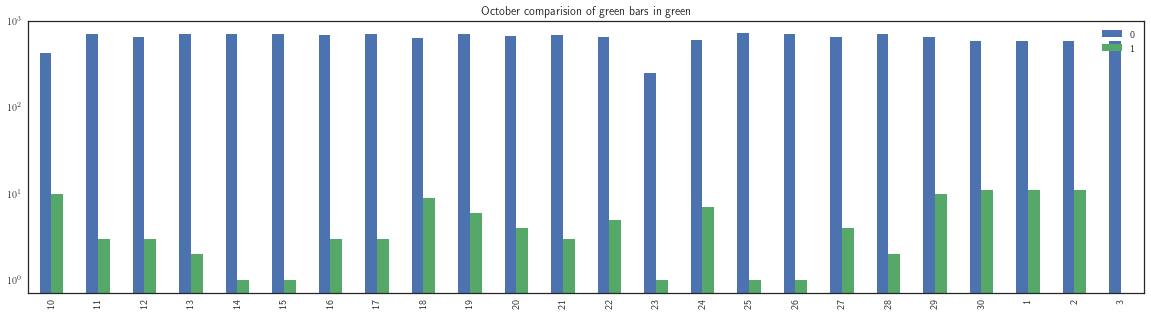

In [248]:
data = {'2013': {1:25,2:81,3:15}, '2014': {1:28, 2:65, 3:75}, '2015': {1:78,2:91,3:86 }}

[[693, 6], [701, 4], [94, 0]]

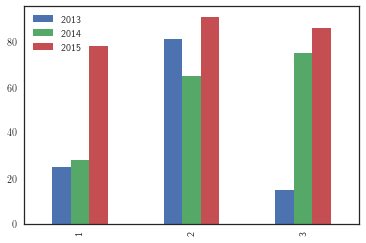

In [249]:

data = {'2013': {1:25,2:81,3:15}, '2014': {1:28, 2:65, 3:75}, '2015': {1:78,2:91,3:86 }}

df = pd.DataFrame(data)

df.plot(kind='bar')

plt.show()

In [266]:
q.T

,0,1
10,431,10
11,705,3
12,657,3
13,708,2
14,704,1
15,703,1
16,686,3
17,706,3
18,631,9
19,700,6


In [240]:
october

[[431, 10, 10, 10],
 [705, 3, 11, 10],
 [657, 3, 12, 10],
 [708, 2, 13, 10],
 [704, 1, 14, 10],
 [703, 1, 15, 10],
 [686, 3, 16, 10],
 [706, 3, 17, 10],
 [631, 9, 18, 10],
 [700, 6, 19, 10],
 [670, 4, 20, 10],
 [682, 3, 21, 10],
 [653, 5, 22, 10],
 [250, 1, 23, 10],
 [597, 7, 24, 10],
 [718, 1, 25, 10],
 [699, 1, 26, 10],
 [650, 4, 27, 10],
 [709, 2, 28, 10],
 [656, 10, 29, 10],
 [587, 11, 30, 10]]

In [171]:
e[e['day']==i]['GREEN'].value_counts()[0]

714

(array([1488.,    0.,    0., 1793., 2115., 2023., 2052., 1500., 2067.,
        2666.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

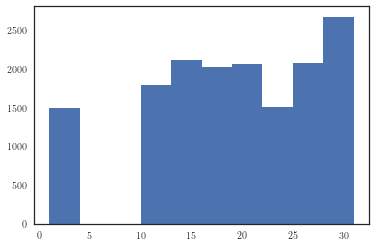

In [132]:
e = pd.concat([df['day'],df['GREEN']], axis=1)
plt.hist(e[e['GREEN']==0]['day'])

In [3]:
df.tail()

,day,hour,minute,PIB,MOZ,NOL,ZEN,SIP,MAZ,FOK,...,FUG,NIT,SIM,DUB,ZIR,RUP,LEM,GIS,POF,SUG
15801,3.0,2.0,58.0,-0.75971,-0.75543,-0.20645,-103.86804,-0.05024,13.72655,0.16634,...,25.72803,0.15707,-0.8235,-2.29603,-0.00440,5.82365,0.20666,-0.00706,0.96213,-0.01240
15802,3.0,3.0,0.0,-0.73075,-0.60813,-0.28543,-102.27720,-0.06322,13.40202,0.16634,...,25.72803,0.15707,-0.8235,-2.29682,-0.00032,6.06426,0.21999,-0.00734,0.18836,-0.01239
15803,3.0,3.0,2.0,-0.71565,-0.43238,-0.16995,-103.61989,-0.07621,13.07750,0.16634,...,25.72803,0.15707,-0.8235,-2.29761,-0.00178,6.06426,0.33864,-0.00920,0.66709,-0.01238
15804,3.0,3.0,4.0,-0.71244,-0.40285,-0.19671,-104.14266,-0.08921,12.75297,0.16634,...,25.72803,0.15707,-0.8235,-2.29841,-0.00137,6.06426,0.20666,-0.00890,1.49408,-0.01238
15805,3.0,3.0,6.0,-0.72814,-0.55974,-0.30143,-104.66540,-0.10220,12.89804,0.16634,...,25.72803,0.15707,-0.8235,-2.29920,-0.00090,6.06426,0.17587,-0.00860,0.45008,-0.01237


### Checking for correlation between columns


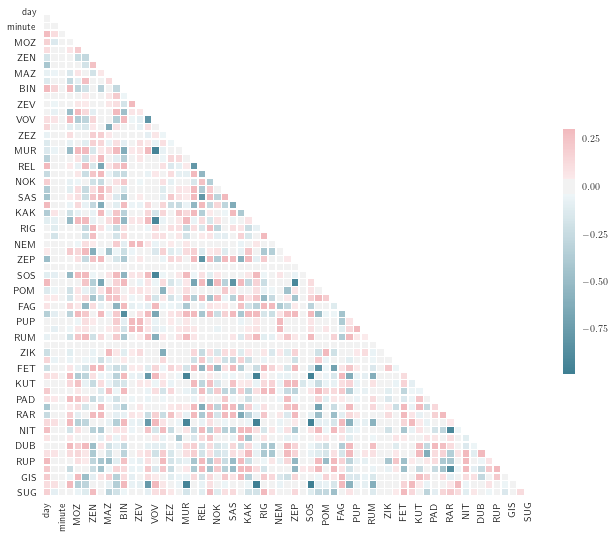

In [4]:
corr_heatmap(df)

### Checking for correlation between columns AFTER getting rid of some columns


before:  (15806, 63)
after:  (15806, 20)
pos: 21	neg: 22


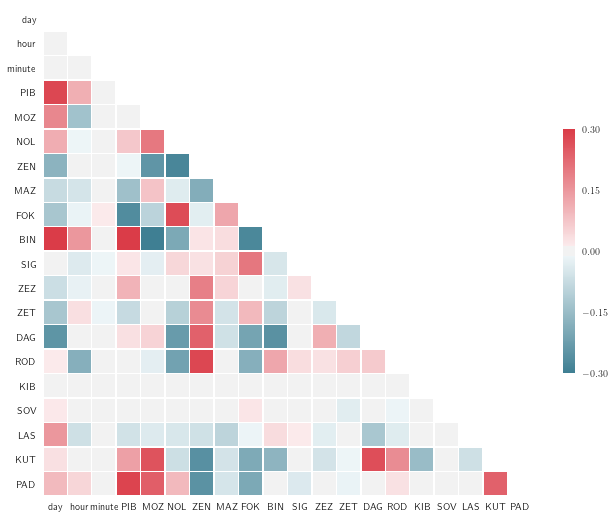

In [5]:
uncorr_df, deleted_columns = correlation(df, 0.31)
X = np.array(uncorr_df)
corr_heatmap(uncorr_df)

# Checking if any columns are from the normal distribution

In [6]:
a = [st.normaltest(X[:,i])[1] for i in range(X.shape[1])]
alpha = 0.05
print((np.array(a)<alpha).all())

True


#### Hence non are from the normal distribution

## Using PCA to preview the data

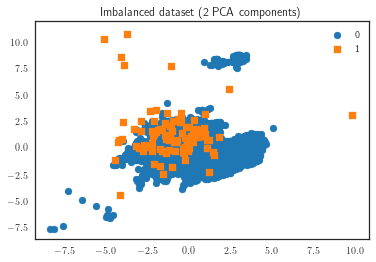

In [7]:
X_pca = standardize_data(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)
plot_2d_space(X_pca, y, 'Imbalanced dataset (2 PCA components)')

------

# Training and building models
   Using SVM and Random Forest classifiers
    1. On an imbalanced dataset 
    2. On a balanced dataset using oversampling techinques

# Imbalanced dataset

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


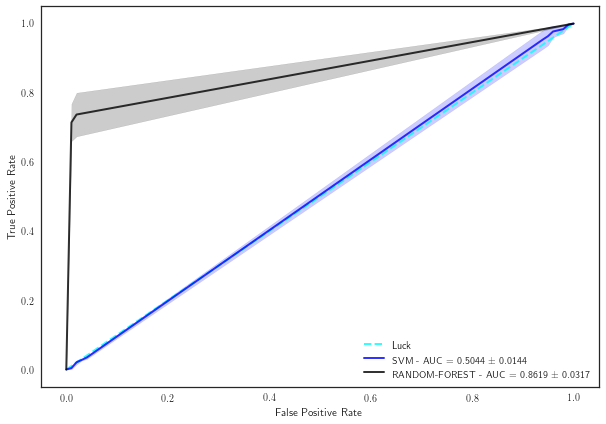

,Model,accuracy,recall,precision,f1-score,param 1,param 2
0,SVM,0.9935468+/-0.0000007,0.0+/-0,0.0+/-0,0.9967629+/-0.0000004,0.001,10
0,RANDOM-FOREST,0.99563+/-0.00033,0.87+/-0.06,0.382+/-0.029,0.9948+/-0.0004,6.000,100


In [8]:
SVM_1_performance, SVM_1_roc = model(X, y,
                                     n_splits=3, seed=42,
                                     model_name='SVM',
                                    over_sampling = False)
RM_1_performance, RM_1_roc = model(X, y,
                                   n_splits=3, seed=42,
                                   model_name='RANDOM-FOREST',
                                   over_sampling = False)
plot_roc([SVM_1_roc, RM_1_roc])
result = pd.concat([SVM_1_performance, RM_1_performance])
result

The performance is quite poor, let's try to use sampling techniques to better train our model

# balanced (oversampled) dataset
#### dropping SVM as it has really poor results, but on the other hand Random Forst reduces overfitting 
1.  First using cross validation, I will gry to get the best hyperparamters
2. Using the best hyperparamters, I will train a seperate model. This require the right approach to over sampling. Where we have a hold out test set

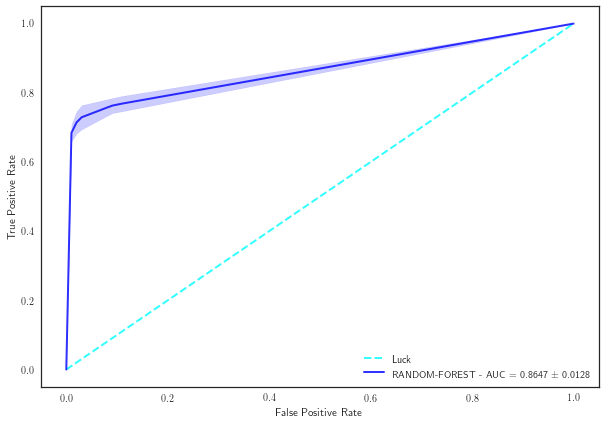

,Model,accuracy,recall,precision,f1-score,param 1,param 2
0,RANDOM-FOREST,0.9946+/-0.0005,0.63+/-0.08,0.44+/-0.09,0.9942+/-0.0006,8,100


In [9]:
RM_1_performance, RM_1_roc = model(X, y,
                                   n_splits=3, seed=42,
                                   model_name='RANDOM-FOREST',
                                   over_sampling = True)
plot_roc([ RM_1_roc])
RM_1_performance

## Correct way to oversampling knowing the best hyperparameters

In [10]:
X = standardize_data(X)

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='minority')

In [12]:
# First split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

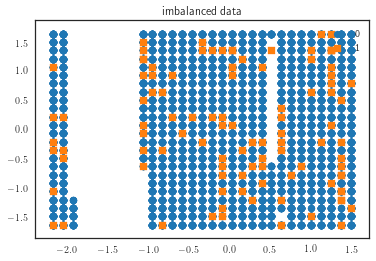

In [13]:
plot_2d_space(X, y, 'imbalanced data')

In [14]:
# Then split again to oversample only on the training
# not on the validation nore test set

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
#over-sample
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print(np.unique(y_train_res, return_counts=True))

(array([0, 1]), array([6591, 6591]))


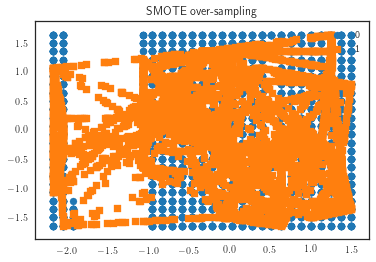

In [15]:
plot_2d_space(x_train_res, y_train_res, 'SMOTE over-sampling')

In [28]:
#TRAIN
clf_rf = RandomForestClassifier(n_estimators = 100,
                                max_depth = 6,
                                random_state= 42)
#clf_rf.fit(x_train_res, y_train_res)
clf_rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
#X_test, y_test = sm.fit_sample(X_test, y_test)


In [18]:
#metrics
#X_test, y_test = sm.fit_sample(X_test, y_test)
print ('Validation Results')
y_pred_val = clf_rf.predict(X_val)
print ("accuracy: ", clf_rf.score(X_val, y_val))
print ("recll: ",recall_score(y_val, clf_rf.predict(X_val)))
print("classification report:",classification_report(y_val, y_pred_val)) 

print ('\nTest Results')
y_pred_test = clf_rf.predict(X_test)
print ("accuracy: ", clf_rf.score(X_test, y_test))
print ("recll: ", recall_score(y_test, clf_rf.predict(X_test)))
print("classification report:",classification_report(y_test, y_pred_test)) 

Validation Results
accuracy:  0.9768014059753954
recll:  0.75
classification report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2829
           1       0.16      0.75      0.27        16

   micro avg       0.98      0.98      0.98      2845
   macro avg       0.58      0.86      0.63      2845
weighted avg       0.99      0.98      0.98      2845


Test Results
accuracy:  0.9767515419895619
recll:  0.6923076923076923
classification report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6284
           1       0.17      0.69      0.27        39

   micro avg       0.98      0.98      0.98      6323
   macro avg       0.58      0.84      0.63      6323
weighted avg       0.99      0.98      0.98      6323



In [19]:
X.shape

(15806, 20)

# saving model

In [29]:
from sklearn.externals import joblib
filename = '../data/finalized_model.sav'
joblib.dump(clf_rf, filename)
 
 

['../data/finalized_model.sav']

In [30]:
# load the model from disk
loaded_model = joblib.load(filename)

In [31]:
test = pd.read_csv("../data/Scrumpulicious_test.csv")
test = data_processing(test)
test = test.drop(deleted_columns, axis=1)
test.head()

,day,hour,minute,PIB,MOZ,NOL,ZEN,MAZ,FOK,BIN,SIG,ZEZ,ZET,DAG,ROD,KIB,SOV,LAS,KUT,PAD
0,6.0,3.0,0.0,0.32613,4.41527,2.08047,-10.36190,-10.78790,-0.00077,-0.06506,0.03181,0.07340,0.02083,0.86994,-0.02640,0.01400,-2.34362,-0.25956,-0.49867,0.09655
1,6.0,3.0,2.0,0.41189,4.36346,2.04116,-12.45995,-9.79011,-0.00077,-0.06506,0.03181,0.07343,0.02065,0.86994,-0.02318,0.00296,-3.61267,-0.25956,-1.29076,0.09688
2,6.0,3.0,4.0,0.31503,4.49688,2.21122,-10.84578,-9.30919,-0.01129,-0.06506,0.01594,0.07346,0.02048,0.86994,-0.02436,0.05474,-0.46988,-0.25956,-0.59566,0.09721
3,6.0,3.0,6.0,0.26113,4.57136,2.04383,-10.10387,-9.66460,-0.00217,-0.06506,0.01060,0.07348,0.02030,0.86994,-0.04014,0.03564,2.67290,-0.25956,0.77335,0.09754
4,6.0,3.0,8.0,0.22995,4.56271,2.20106,-11.72043,-9.13658,-0.00077,-0.06506,0.01594,0.07351,0.02012,0.86994,-0.03300,0.09948,-1.46339,-0.25956,-0.07228,0.09787


In [32]:
test = standardize_data(np.array(test))

In [33]:
print ('Test data Results')
y_pred_test = loaded_model.predict(test) 
np.unique(y_pred_test, return_counts=True)

Test data Results


(array([0, 1]), array([2553,   39]))

In [34]:
loaded_model.predict(test) 

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
data = np.unique(y, return_counts=True)[1]
print(("{:.2f}%".format((data[1]/data[0])*100)))

0.65%


In [36]:
data = np.unique(y_pred_test, return_counts=True)[1]
print(("{:.2f}%".format((data[1]/data[0])*100)))

1.53%
